# Top Selling Amazon Books 

About the dataset:
This dataset contains information about top selling books of Amazon(550 books) either belonging to fiction or non-fiction.



# 1.Importing Libraries 😁



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2.Loading the Dataset 🌠

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = '../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv'

In [3]:
df = pd.read_csv('/kaggle/input/book-data/bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# 3.Data Preparation and Cleaning 🤠

We will explore the dataset here and if there is any null values.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
### to get an overview of the dataframe
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


- It is clear from the above table that maximum price of a book is 105$ and maximum rating is 4.9.

In [6]:
r,c = df.shape
print(f"The dataset has {r} rows and {c} columns.")

The dataset has 550 rows and 7 columns.


### 3.A.Renaming Columns

In [7]:
#To rename the columns and make it easy to use:
df.columns=['name','author','user_rating','reviews','price','year','genre']

In [8]:
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


### 3.B. Checking for null values

In [9]:
#To check if there is any null value in the dataframe
df.isnull().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [10]:
#For total number of different books
len(df.name.unique())

351

**Total number of unique books are 351 but total rows are 550.**

This is clear if we see the dataframe that some books are repeatedly among the top sellers in different years.

### 3.C. Adding a feature

**Lets add another columns to the dataframe which tells us the estimated profit which is no doubt less than the total earned but provides us with a brief overview of how much is earned for sure.**

In [11]:
df['estimated_profit']=df.reviews*df.price

# 4. Exploratory Analysis and Visualization

Here we will see the trends of different columns and get the insights of the dataset.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [12]:
# setting the background to be dark, it looks cool with this ;)
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

# Lets put forward some questions.

One thing to note is that this analysis is only valid for the top selling category.
- Which genre has the most books in this category ?
- What is the average rating of each genre?
- What is the popularity of each genre and its relationship with time?
- Which year had the most books sold in this category?
- What effect does time had on the price of books over the years? 
- Price of books of each genre over the years.
- How has been the customer reviews over the years?
- Which genres have the highest and lowest ratings?
- Which author is most popular and which have earned the most in this category?
- Who is the most popular author to each genre?
- Which books have earned the most money in each genre?
- The money making books overall.
- What is the relationship of selling with ratings?


# 1-Which genre has the most books in this category  and their distribution?

In [13]:
fiction_df_values=df[df.genre=='Fiction']
len(fiction_df_values)

240

In [14]:
Nfiction_df=df[df.genre=='Non Fiction']
len(Nfiction_df)

310

In [15]:
genre_dist=df.genre.value_counts()
genre_dist

genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64

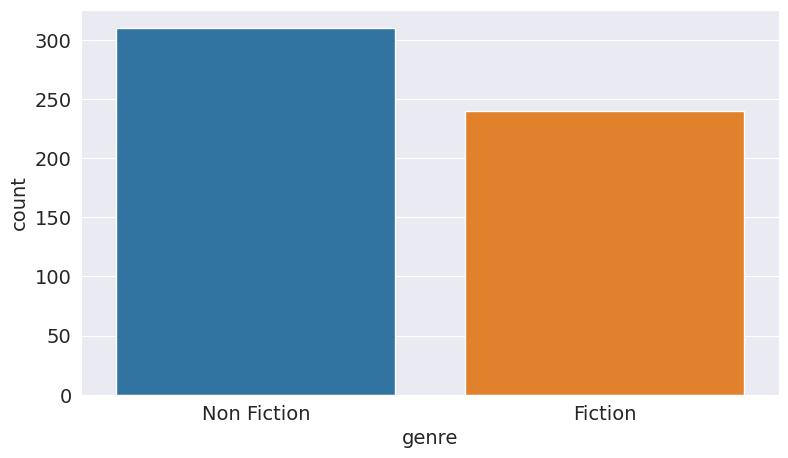

In [16]:
sns.barplot(x=genre_dist.index,y=genre_dist);

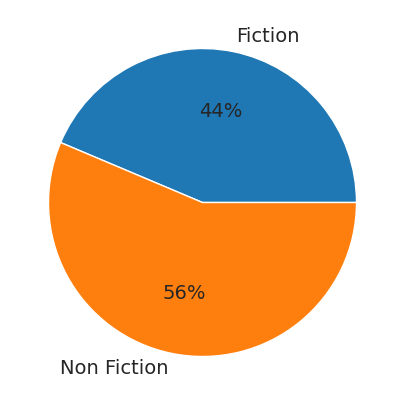

In [17]:
plt.pie([240,310],labels=['Fiction','Non Fiction'],autopct='%.0f%%');

- Non Fiction books are in majority in top selling category.

### User Ratings Overview:

- What is the average rating of each genre?

In [18]:
df.groupby('genre')['user_rating'].mean()

genre
Fiction        4.648333
Non Fiction    4.595161
Name: user_rating, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


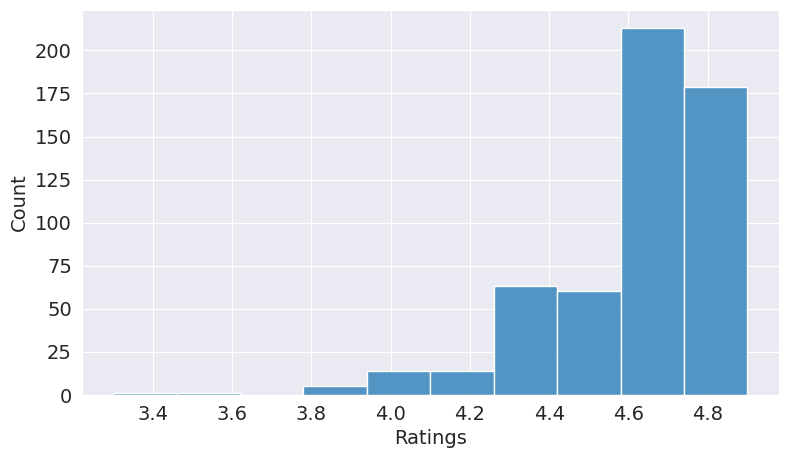

In [19]:
#Distribution of ratings
sns.histplot(data=df.user_rating,bins=10)
plt.xlabel("Ratings");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

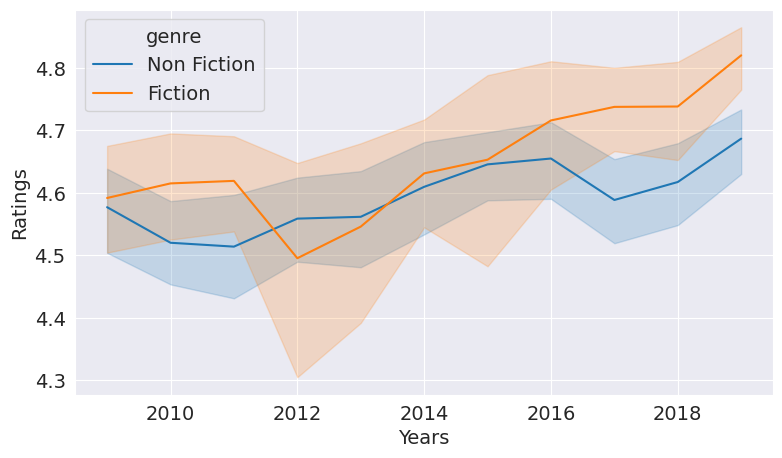

In [20]:
# Relationship of ratings with time.
sns.lineplot(y=df.user_rating,x=df.year,hue=df.genre);
plt.ylabel("Ratings")
plt.xlabel("Years");

- It is clear from the above graph that most of the books received ratings between 4.5 to 4.9.


### Relationship between ratings and price

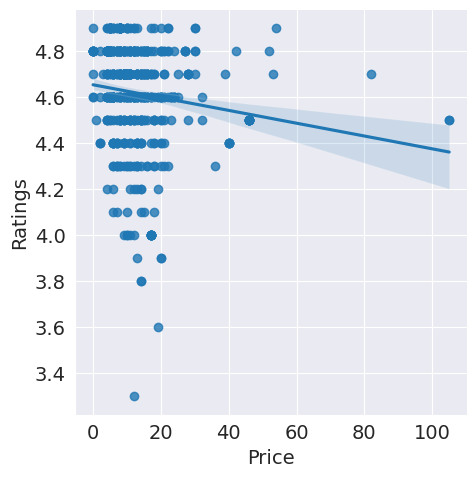

In [21]:
sns.lmplot(y='user_rating',x='price',data=df)
plt.ylabel('Ratings')
plt.xlabel('Price');

**As price increases, rating goes down.**

In [22]:
df.groupby('genre')['user_rating'].mean()

genre
Fiction        4.648333
Non Fiction    4.595161
Name: user_rating, dtype: float64

- This graph shows that there is not a significant relationship between price and ratings but with increasing price , the ratings are falling for both Fiction and Non fiction.

### To get an overview of how much books have earned yearly.

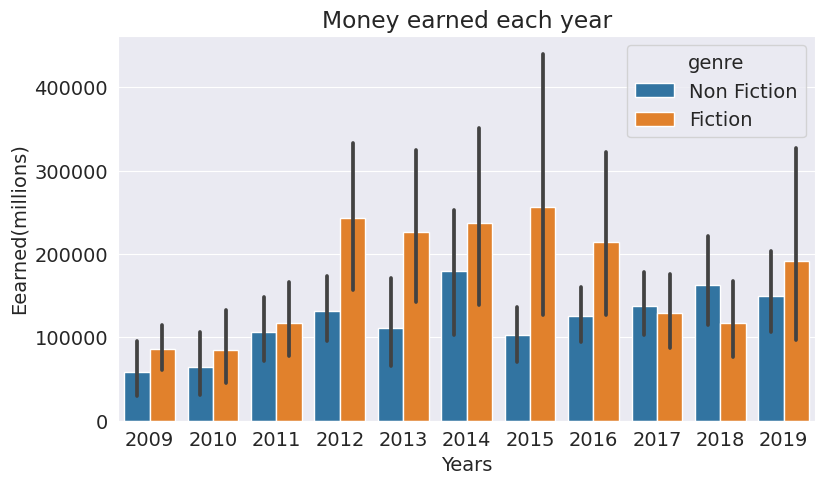

In [23]:
sns.barplot(x=df.year,y=df.estimated_profit,hue=df.genre)
plt.xlabel('Years')
plt.ylabel("Eearned(millions)")
plt.title('Money earned each year');

- Above graph above shows the  earning of these top books ,in most cases, are below 0.8 million.

### Average Profit earned by each book depending on its genre.

In [24]:
genre_average=df.groupby(['genre'])['estimated_profit'].mean()

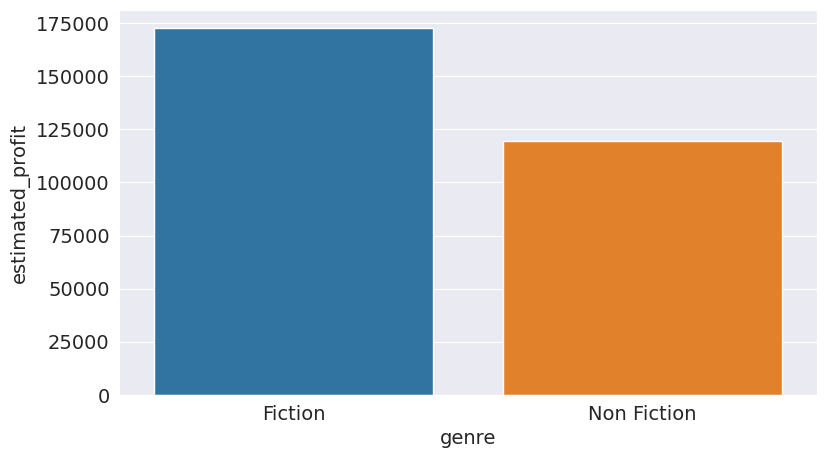

In [25]:
sns.barplot(x=genre_average.index,y=genre_average);

# Q1: TOP 10 Books which earned the most ?

In [26]:
rich_df=df.groupby('name')['estimated_profit'].max()
rich_df=rich_df.sort_values(ascending=False).head(10)
rich_df

name
The Girl on the Train                                                                                 1430028
The Alchemist                                                                                         1396161
Where the Crawdads Sing                                                                               1317615
Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5                              701295
Harry Potter Paperback Box Set (Books 1-7)                                                             700492
The Goldfinch: A Novel (Pulitzer Prize for Fiction)                                                    676880
Becoming                                                                                               672463
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)               661710
The Fault in Our Stars                                                                                 656266
A Gam

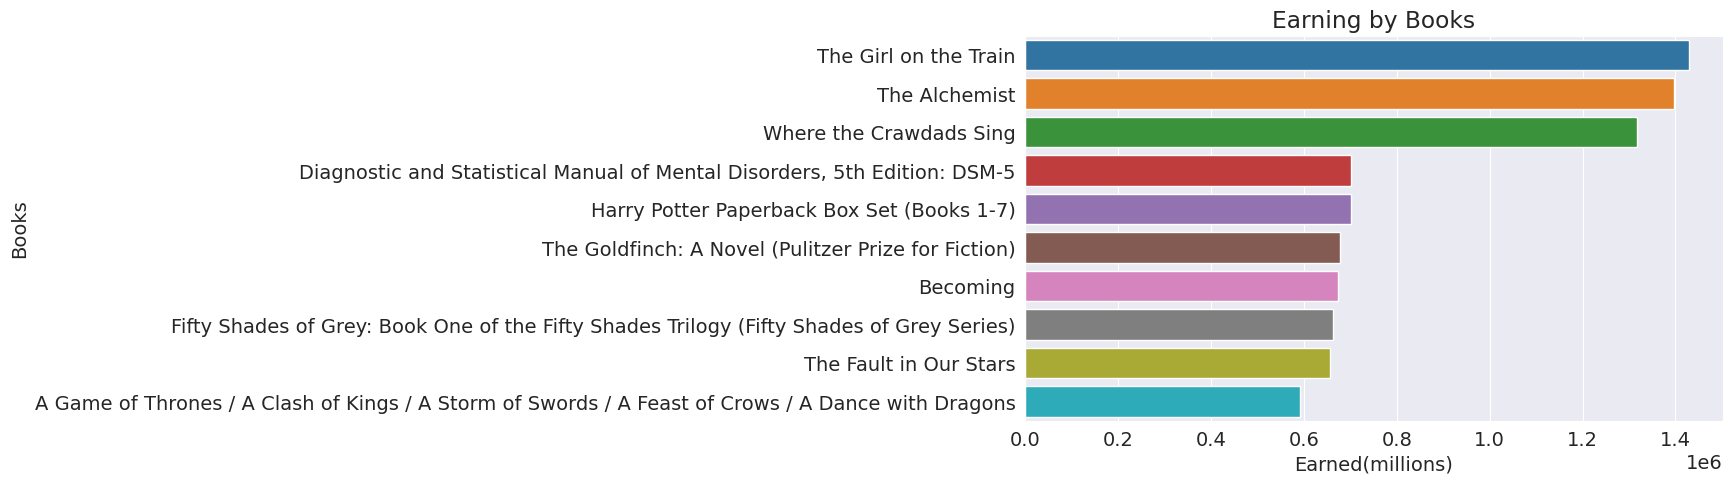

In [27]:
sns.barplot(x=rich_df,y=rich_df.index)
plt.xlabel("Earned(millions)")
plt.ylabel("Books")
plt.title('Earning by Books');

# Q2: Books which earned the most per year (2009-19)

In [28]:
most_earning_book_per_year=df[df.groupby('year')['estimated_profit'].transform(max) == df['estimated_profit']]
most_earning_book_per_year

/tmp/ipykernel_18/3486121753.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  most_earning_book_per_year=df[df.groupby('year')['estimated_profit'].transform(max) == df['estimated_profit']]


,name,author,user_rating,reviews,price,year,genre,estimated_profit
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction,672463
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction,701295
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction,661710
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction,700492
265,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2017,Fiction,458730
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction,394680
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction,1396161
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction,1430028
410,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,2011,Fiction,508470
515,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2010,Non Fiction,474768


In [29]:
most_earning_book_per_year=most_earning_book_per_year.sort_values('year').set_index('year')

In [30]:
most_earning_book_per_year

,name,author,user_rating,reviews,price,genre,estimated_profit
year,,,,,,,
2009,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,Non Fiction,394680
2010,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,Non Fiction,474768
2011,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,Fiction,508470
2012,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,Fiction,661710
2013,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,Non Fiction,701295
2014,The Alchemist,Paulo Coelho,4.7,35799,39,Fiction,1396161
2015,The Girl on the Train,Paula Hawkins,4.1,79446,18,Fiction,1430028
2016,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,Fiction,700492
2017,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,Fiction,458730


### What is the average earning of each genre on per year basis.

In [31]:
genres_per_year_mean=df.groupby(['year','genre'])['estimated_profit'].mean().round(2)

In [32]:
pd.DataFrame(genres_per_year_mean)

estimated_profit
year genre                        
2009 Fiction              85776.79
     Non Fiction          58024.58
2010 Fiction              84522.00
     Non Fiction          64335.63
2011 Fiction             117434.67
     Non Fiction         106295.21
2012 Fiction             242780.67
     Non Fiction         132104.31
2013 Fiction             226853.71
     Non Fiction         110657.31
2014 Fiction             236487.86
     Non Fiction         179397.71
2015 Fiction             256752.82
     Non Fiction         102435.36
2016 Fiction             213931.84
     Non Fiction         125381.45
2017 Fiction             129188.17
     Non Fiction         137256.88
2018 Fiction             117636.00
     Non Fiction         162524.79
2019 Fiction             191812.50
     Non Fiction         150023.50

#### Q4: Trend of books selling (Top rated) over the years.

In [33]:
Earning_Graph=df.groupby('year')['estimated_profit'].sum()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


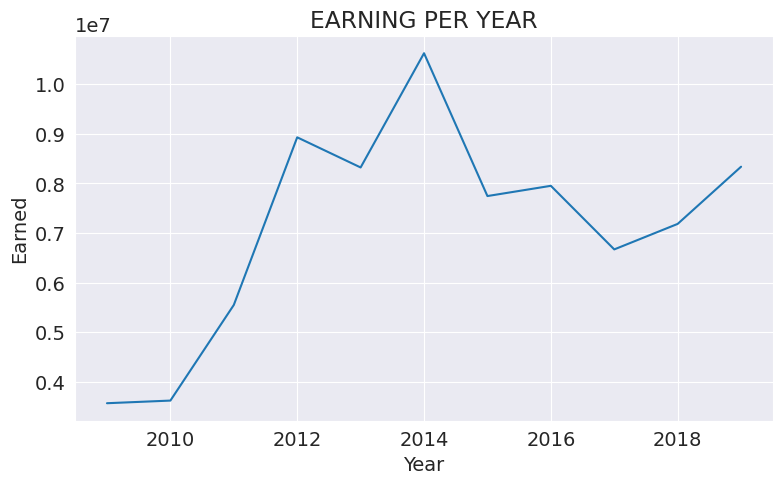

<Figure size 1200x1200 with 0 Axes>

In [34]:
sns.lineplot(data=Earning_Graph)
plt.xlabel('Year')
plt.ylabel("Earned")
plt.title("EARNING PER YEAR")
plt.figure(figsize=(12,12));

#### Q5: Top 5 authors which earned the most.

In [35]:
authors=df.groupby('author')['estimated_profit'].sum()

In [36]:
authors=authors.sort_values(ascending=False).head(10)
authors

author
American Psychological Association    3946800
Suzanne Collins                       3368646
E L James                             2517303
John Green                            2381609
Laura Hillenbrand                     2284821
Paula Hawkins                         1986150
Gillian Flynn                         1660859
Gary Chapman                          1516167
Dr. Seuss                             1423598
American Psychiatric Association      1402590
Name: estimated_profit, dtype: int64

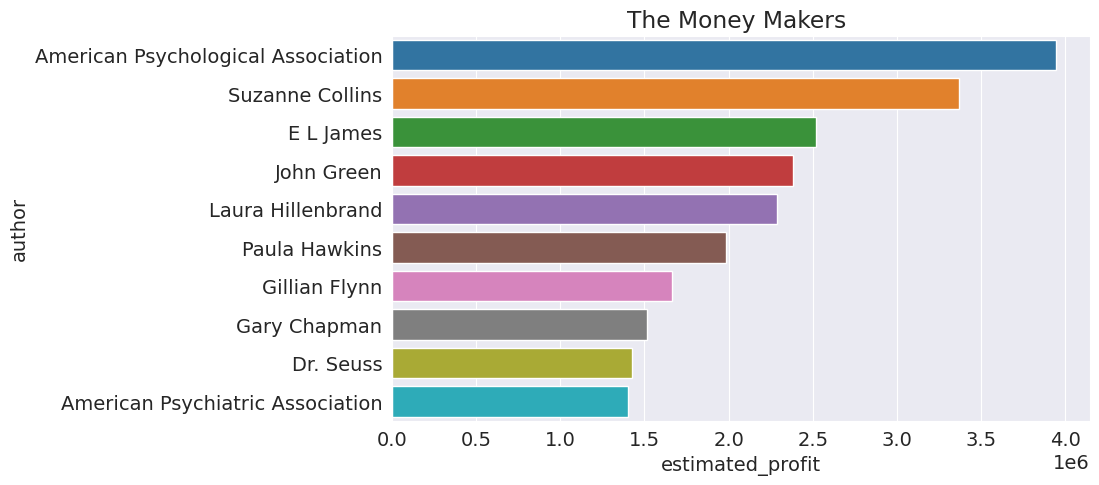

In [37]:
sns.barplot(y=authors.index,x=authors)
plt.title('The Money Makers ');

# Thank you